In [1]:
import products_analysis as pa
order_items_df = pa.read_item_order_df()

In [2]:
order_items_count = pa.prepare_item_orders(order_items_df=order_items_df)
order_items_count.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,rank,count
44648,657c1689361cce2eeaabea76ced5e30f,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-12-21 02:12:21,75.0,13.08,1,527
78215,b20541ce2d6f4c7d3b204035f09ea681,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-09 04:30:36,69.9,12.43,1,527
72419,a52c52c656d3b3ef3ec72fcdc13c714f,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-26 12:31:56,69.9,0.00,1,527
75915,acdb814f2758bfa4cf10c3ce5cb09c81,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-12 22:48:55,69.9,21.57,1,527
68781,9d241238f3827aced623154ace551dd9,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-16 03:48:52,69.9,12.43,1,527


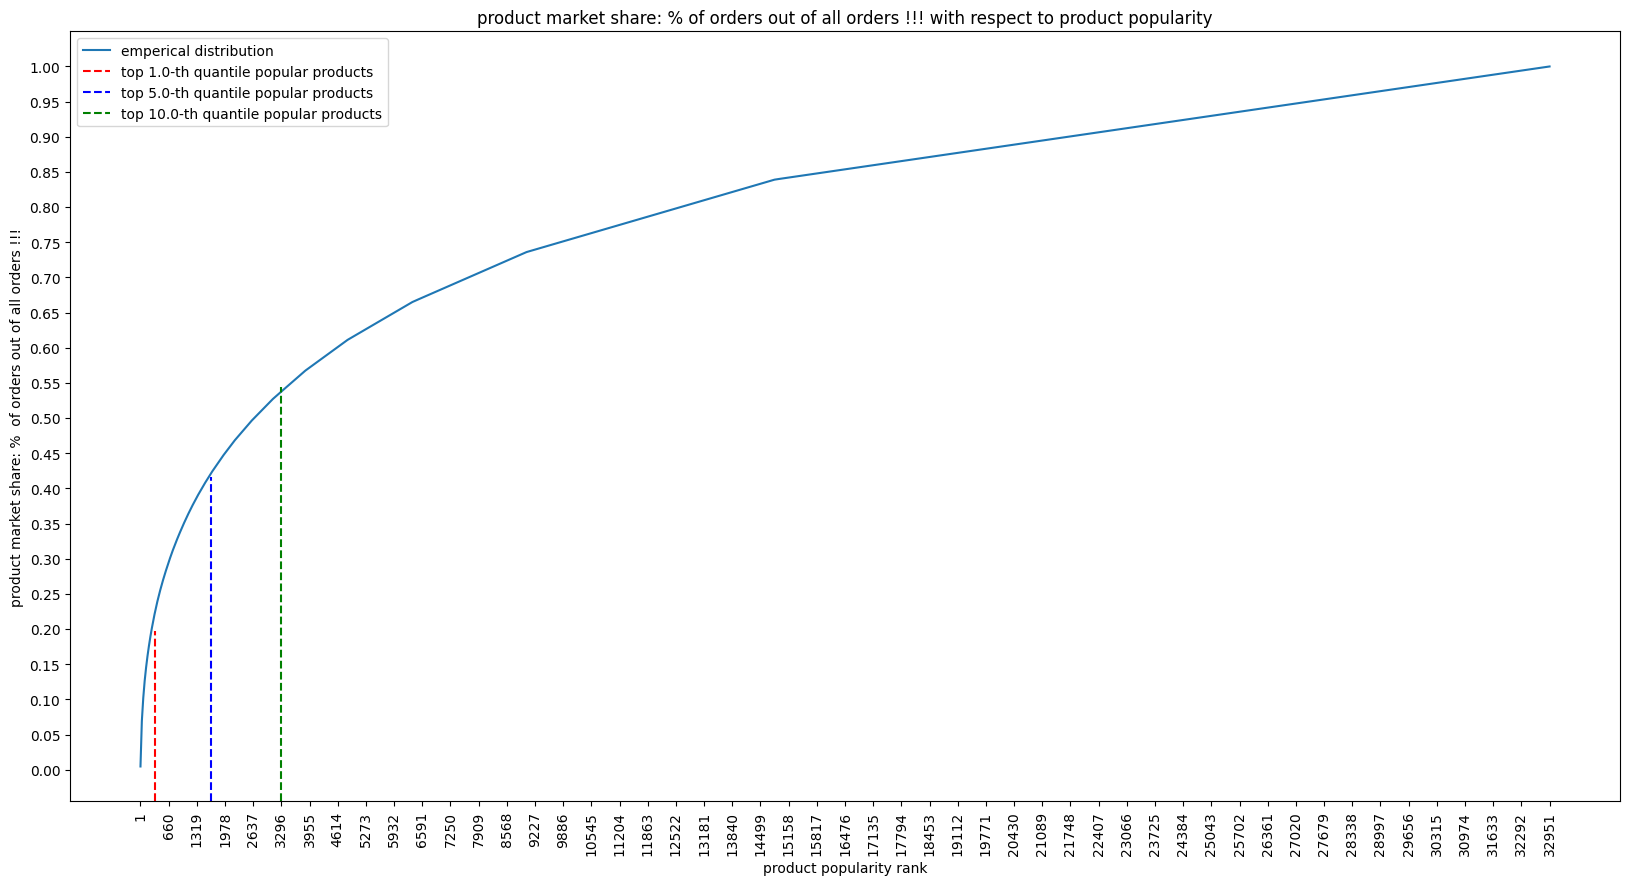

In [3]:
qx, qy = pa.display_product_orders_skewness(order_item_count=order_items_count, figsize=(20, 10))

In [4]:
# the number of unique products
import numpy as np
num_unique_products = len(np.unique(order_items_count['product_id']))
for x, y in zip(qx, qy):
    print(f"the top {x} products (out of {num_unique_products} products) occupy { round(y* 100, 2)} % of the market share")

the top 330 products (out of 32951 products) occupy 22.12 % of the market share
the top 1648 products (out of 32951 products) occupy 42.13 % of the market share
the top 3296 products (out of 32951 products) occupy 53.78 % of the market share


Given the extreme skewness of the products / orders data, we will focus only on the most popular $5\%$ of products.

In [5]:
# let's filter the products
top_order_item_df = pa.filter_order_item_csv_top_products(order_item_count=order_items_count, quantile_rank=qx[1])
top_order_item_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,rank,count
44648,657c1689361cce2eeaabea76ced5e30f,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2017-12-21 02:12:21,75.0,13.08,1,527
78215,b20541ce2d6f4c7d3b204035f09ea681,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-09 04:30:36,69.9,12.43,1,527
72419,a52c52c656d3b3ef3ec72fcdc13c714f,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-04-26 12:31:56,69.9,0.00,1,527
75915,acdb814f2758bfa4cf10c3ce5cb09c81,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-12 22:48:55,69.9,21.57,1,527
68781,9d241238f3827aced623154ace551dd9,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-03-16 03:48:52,69.9,12.43,1,527


# Number of pictures and product popularity ?
Can we find enough statistical evidence to determine the significance of image quality and the length of the description on the popularity of the product ?

In [6]:
products_df = pa.read_products_df()
top_products = pa.prepare_products_df(top_products_order_item_df=top_order_item_df, products_df=products_df)
len(top_products)

1648

out of the top products, 829 have only 1 photo attached, 819 have at least 2 photos attached


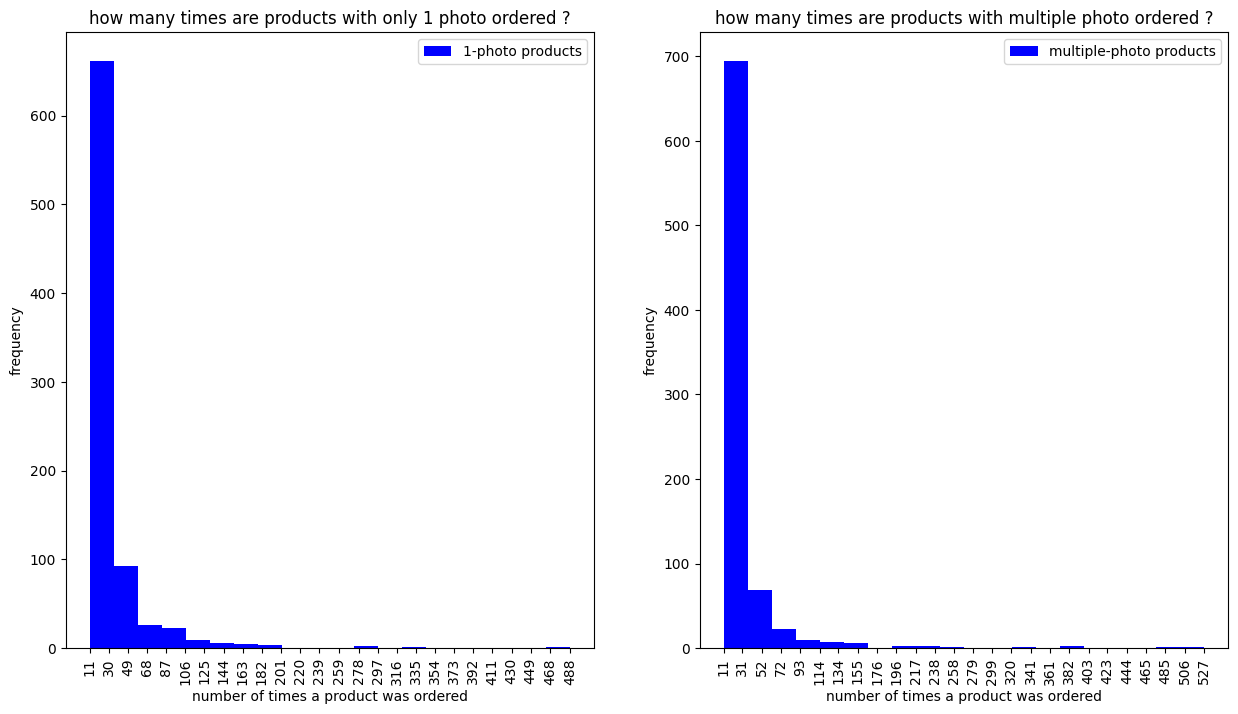

In [7]:
p0, p1 = pa.analyze_products_num_photos(top_products=top_products, figsize=(15, 8))

The plots above display 3 important pieces of information:

1. Even among the top products the distribution is still skewed, only very few products are on very high demand (400 + orders), while most products are ordered around between 10 and 50 times
2. According to observation number 1, The distribution above is very unlikely to be normal !!
3. On a first glance the distrubtion of number of orders between products with only one photo and multiple photos is very similar.

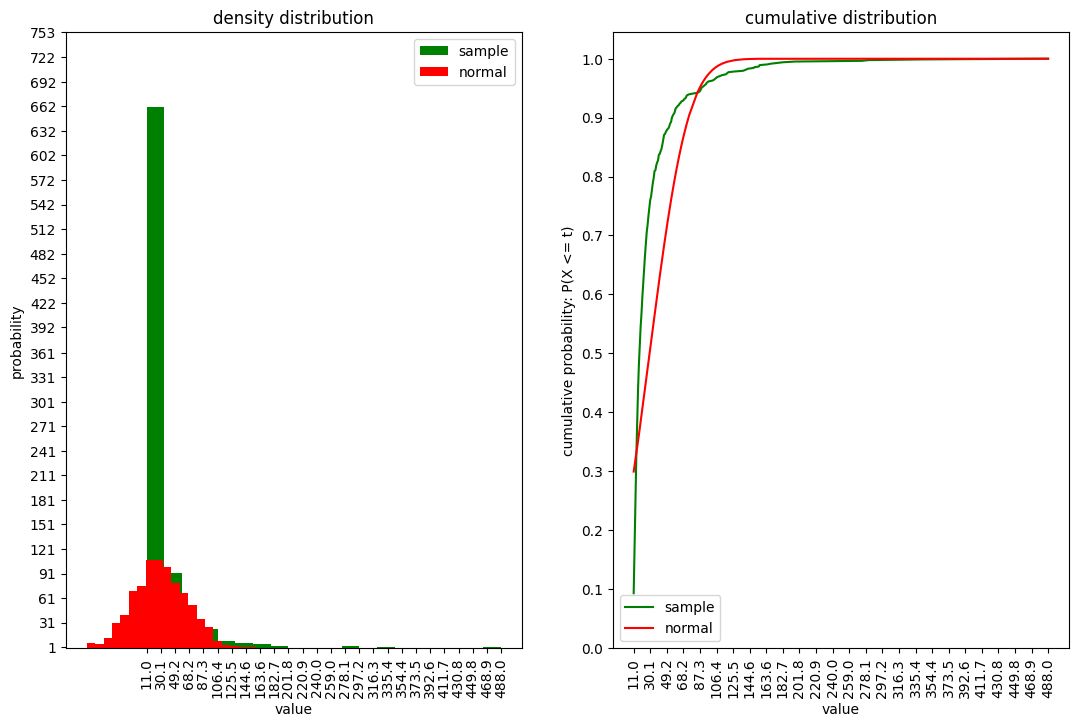

In [12]:
# let's confirm the non-normality of the data with a statistical test
import stats_utils as su
import importlib
importlib.reload(su)
# products with only 1 photo
p0_pvalue = su.test_sample_normal_distribution(p0['count'], display=True)

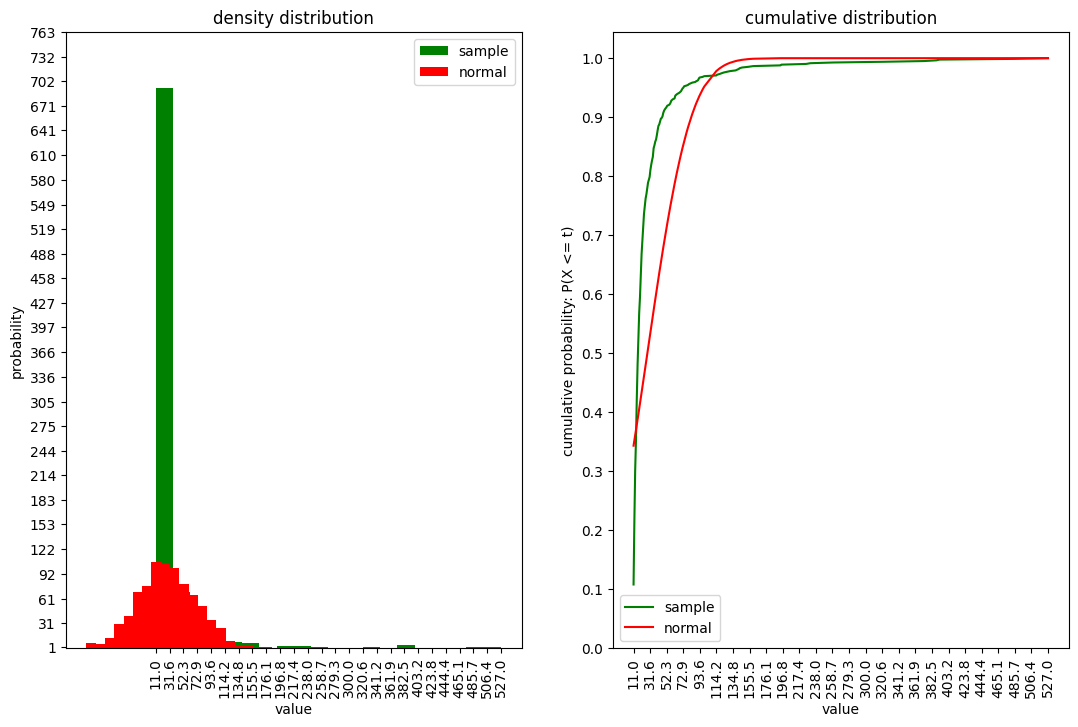

In [13]:
p1_pvalue = su.test_sample_normal_distribution(p1['count'].values, display=True)

In [14]:
print(f"products with only 1 photo: {p0_pvalue}")
print(f"products with multiple photos: {p1_pvalue}")

products with only 1 photo: [2.2430428324834686e-66]
products with multiple photos: [1.9047094032566232e-86]


Due to the non-normality of the data, we will use non-parametric tests to determine whether the average number of orders of a product with 1 photo is significantly different from a product with multi photos

In [15]:
# can we see the problem now ?
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(p0['count'].values, p1['count'].values)
print(p)

0.00901957513479793


In [ ]:
# TODO: consider one sided hypothesis testing

with a p-value quite large; $\approx 0.28 > > > 0.05$, then we can safely conclude that there is no significant difference in popularity between products with only 1 picture and those with multiple pictures. 

Sellers might probably need to focus on better descriptions for their products at this point...